# Objetive: 

### 1. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Set the style
plt.style.use("ggplot")
sns.set_theme()

# Remove scientific notation
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Load dataset
file_path = "../Data/downloaded/premios_export.csv"
df = pd.read_csv(file_path)

### 2. Exploring The Data

In [4]:
# First lines of dataset
df.head()

,id,numero_sorteo,numero_premiado,letras,monto,vendedor,ciudad,departamento
0,87814,390,44,P,600.00,NaN,NaN,NaN
1,87815,390,80,DT,600.00,NaN,NaN,NaN
2,87816,390,129,TT,"1,000.00",NaN,NaN,NaN
3,87817,390,180,DT,600.00,NaN,NaN,NaN
4,87818,390,228,P,800.00,NaN,NaN,NaN


In [5]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31021 entries, 0 to 31020
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               31021 non-null  int64  
 1   numero_sorteo    31021 non-null  int64  
 2   numero_premiado  31021 non-null  int64  
 3   letras           31021 non-null  object 
 4   monto            31021 non-null  float64
 5   vendedor         2932 non-null   object 
 6   ciudad           2556 non-null   object 
 7   departamento     2556 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.9+ MB


In [6]:
# Statistics of dataset
df.describe()

,id,numero_sorteo,numero_premiado,monto
count,"31,021.00","31,021.00","31,021.00","31,021.00"
mean,"105,815.21","2,195.84","41,291.75","2,813.27"
std,"16,448.74","1,246.63","24,000.45","49,491.72"
min,"87,814.00",390.00,1.00,500.00
25%,"95,569.00",394.00,"20,541.00",600.00
50%,"103,324.00","3,052.00","41,179.00",700.00
75%,"111,079.00","3,061.00","61,180.00","1,000.00"
max,"178,251.00","3,069.00","99,995.00","5,000,000.00"


In [7]:
# null values per column
df.isnull().sum()

id                     0
numero_sorteo          0
numero_premiado        0
letras                 0
monto                  0
vendedor           28089
ciudad             28465
departamento       28465
dtype: int64

### 3. Data Imputation (cleaning)

In [8]:
# replace the null values with "N/A"
"""
Vendedor, ciudad and departamento are categorical variables, 
and filling them with N/A does not affect the analysis.
"""

df['vendedor'] = df['vendedor'].fillna("N/A")
df['ciudad'] = df['ciudad'].fillna("N/A")
df['departamento'] = df['departamento'].fillna("N/A")


In [9]:
# Removing column `id`
"""
Column id is not relevant for the analysis
therefore it can be removed.
"""
df.drop(columns=['id'], inplace=True)
df.head()

,numero_sorteo,numero_premiado,letras,monto,vendedor,ciudad,departamento
0,390,44,P,600.00,N/A,N/A,N/A
1,390,80,DT,600.00,N/A,N/A,N/A
2,390,129,TT,"1,000.00",N/A,N/A,N/A
3,390,180,DT,600.00,N/A,N/A,N/A
4,390,228,P,800.00,N/A,N/A,N/A


In [10]:
# null values per column
df.isnull().sum()

numero_sorteo      0
numero_premiado    0
letras             0
monto              0
vendedor           0
ciudad             0
departamento       0
dtype: int64

### 4. Basic Statistic in amount (monto)

In [11]:
print(df['monto'].describe())

count      31,021.00
mean        2,813.27
std        49,491.72
min           500.00
25%           600.00
50%           700.00
75%         1,000.00
max     5,000,000.00
Name: monto, dtype: float64


In [12]:
print(df['numero_premiado'].describe())

count   31,021.00
mean    41,291.75
std     24,000.45
min          1.00
25%     20,541.00
50%     41,179.00
75%     61,180.00
max     99,995.00
Name: numero_premiado, dtype: float64


### 5. Distribution Prize by amount ('monto')

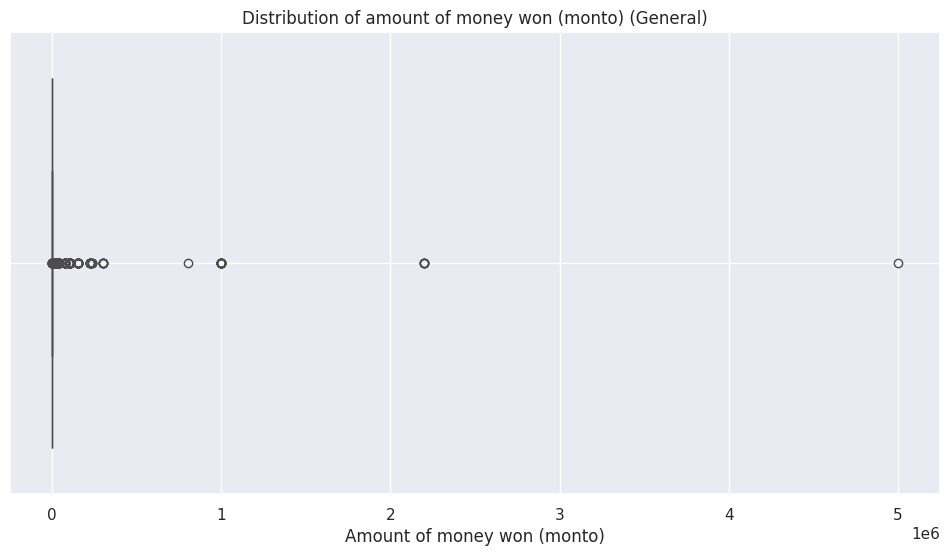

In [13]:
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(x=df['monto'], color='orange')

# Set title and tags
plt.title('Distribution of amount of money won (monto) (General)')
plt.xlabel('Amount of money won (monto)')
plt.grid(True)
plt.show()


### Distribution Prize by amount (Interquartile Range)

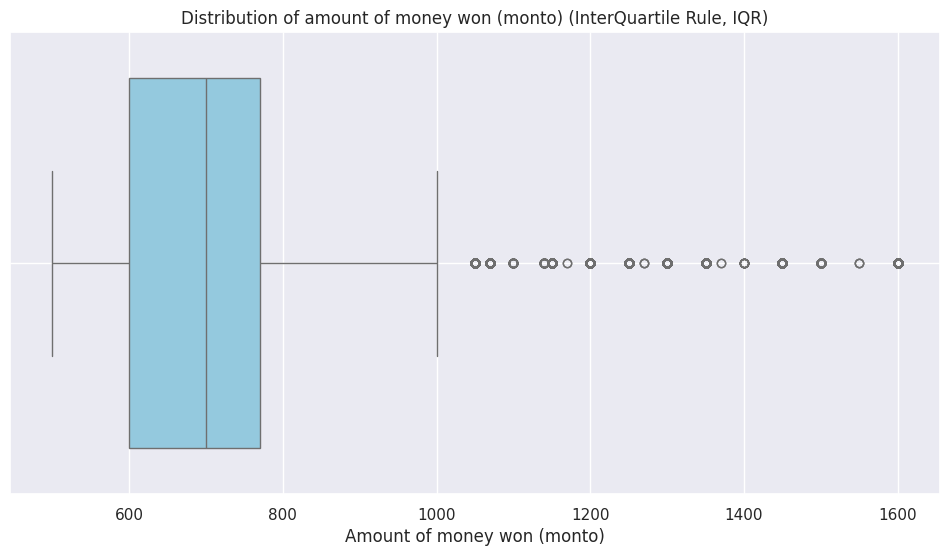

In [14]:
Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

# Filter values ​​within the interquartile range
df_filtered_IQR = df[(df['monto'] >= Q1 - 1.5 * IQR) & (df['monto'] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(12,6))

# Create boxplot without outliers
sns.boxplot(x=df_filtered_IQR['monto'], color='skyblue')
plt.title("Distribution of amount of money won (monto) (InterQuartile Rule, IQR)")
plt.xlabel('Amount of money won (monto)')
plt.grid(True)
plt.show()

### General Boxplot for wining numbers ('numero_premiado')

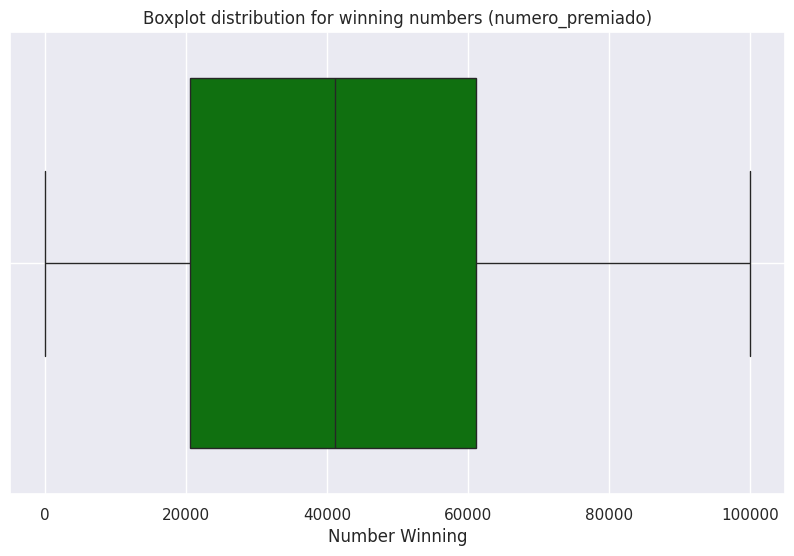

In [15]:
plt.figure(figsize=(10, 6))

# Boxplot for winning numbers (numero_premiado)
sns.boxplot(x=df['numero_premiado'], color="green")

plt.title('Boxplot distribution for winning numbers (numero_premiado)')
plt.xlabel('Number Winning')
plt.grid(True)
plt.show()

### General boxplot for letter combinations (letras)

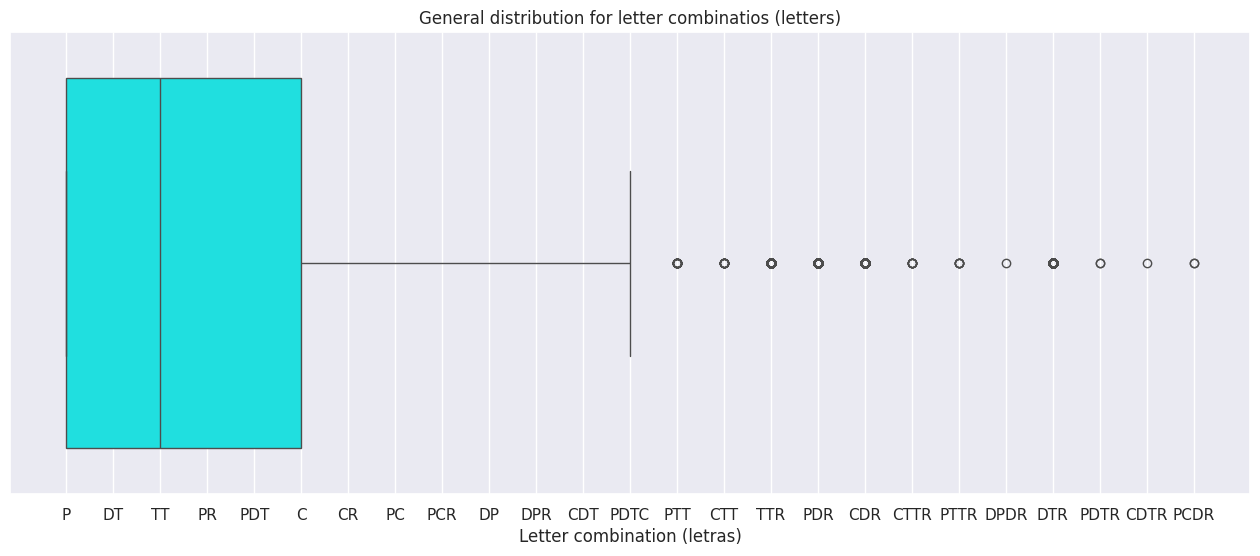

In [16]:
plt.figure(figsize=(16, 6))

sns.boxplot(x=df['letras'], color='#00FFFF')
plt.title('General distribution for letter combinatios (letters)')
plt.xlabel('Letter combination (letras)')
plt.show()

### Boxplot for numbers and letter combinations ('numeros_premiados', 'letras')

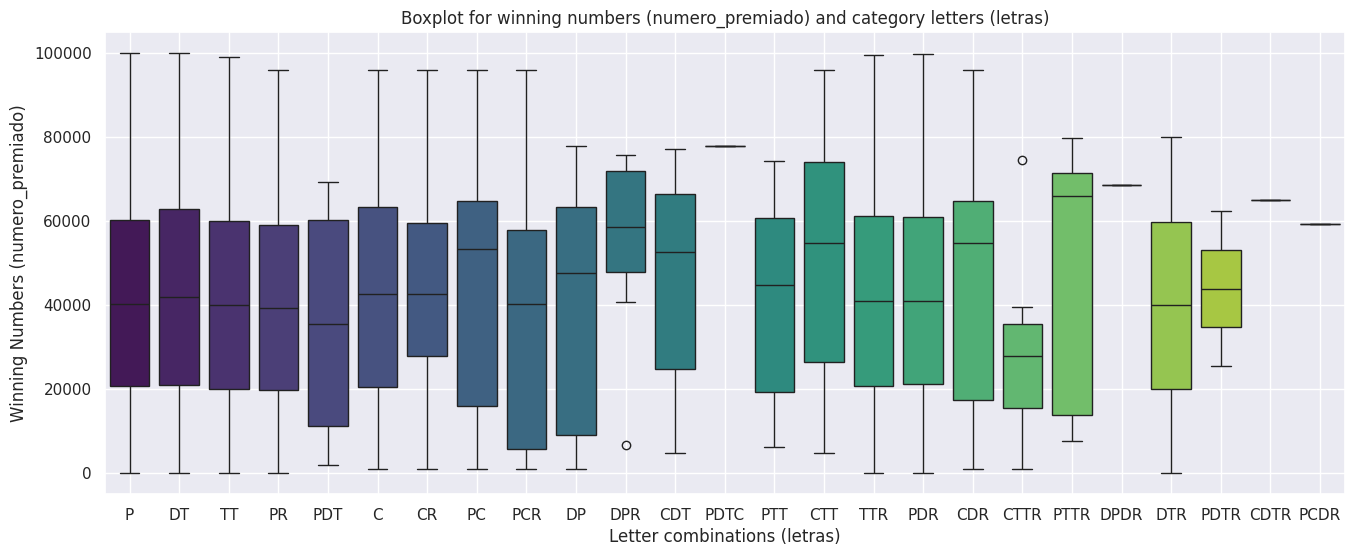

In [17]:
plt.figure(figsize=(16, 6))

# Boxplot by letters (letras) 
sns.boxplot(x='letras', y='numero_premiado', data=df, palette='viridis', hue='letras', dodge=False)

plt.title('Boxplot for winning numbers (numero_premiado) and category letters (letras)')
plt.xlabel('Letter combinations (letras)')
plt.ylabel('Winning Numbers (numero_premiado)')
plt.grid(True)
plt.show()

### Boxplot for amount won and letter combinations IQR ('monto', 'letras')

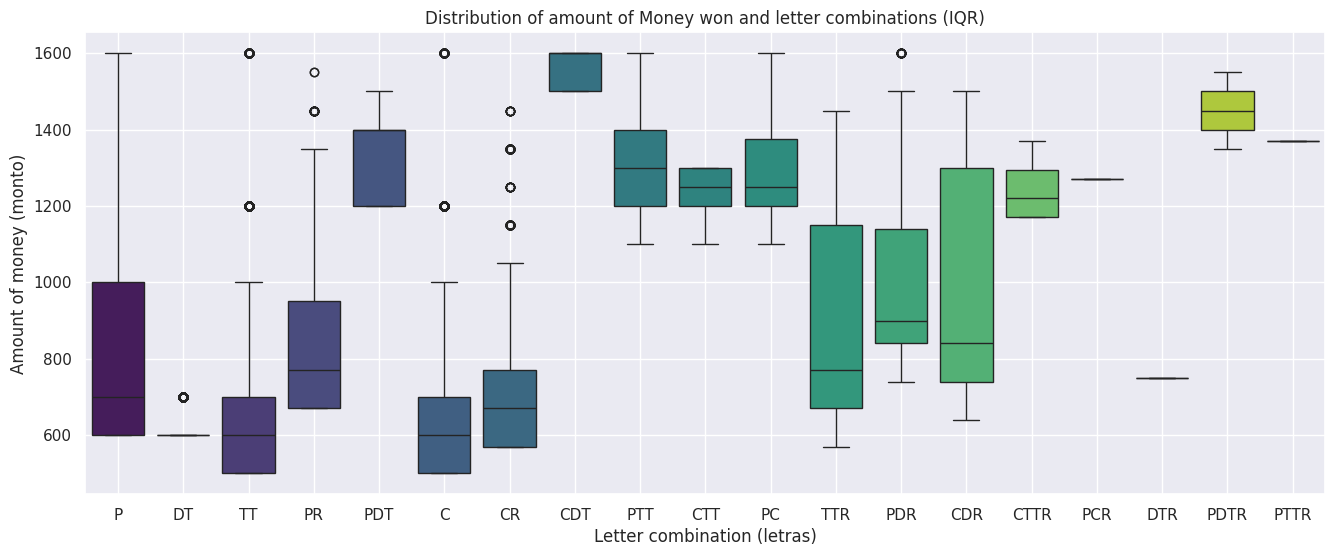

In [18]:
Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

# Filter values ​​within the interquartile range
df_filtered_IQR = df[(df['monto'] >= Q1 - 1.5 * IQR) & (df['monto'] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(16, 6))

# Boxplot for amount and letters (monto, letras)
sns.boxplot(x='letras', y='monto', data=df_filtered_IQR, palette='viridis', hue='letras', dodge=False)
plt.title('Distribution of amount of Money won and letter combinations (IQR)')
plt.ylabel('Amount of money (monto)')
plt.xlabel('Letter combination (letras)')
plt.grid(True)
plt.show()


### Analyze Sales and Insights for the columns of the seler, city and department "vendedor", "ciudad" y "departamento"

In [19]:
df_filtered_vendedor_city_department = df[
    (df['vendedor'] != "N/A") &
    (df['ciudad'] != "N/A") &
    (df['departamento'] != "N/A")
]

df_filtered_vendedor_city_department.head()

,numero_sorteo,numero_premiado,letras,monto,vendedor,ciudad,departamento
14,390,876,P,"15,000.00",MANUEL ROLANDO QUINILLA CHIVALAM,DE ANTIGUA GUATEMALA,SACATEPÉQUEZ
50,390,3180,PDT,"2,600.00",MARIA LUISA GARRIDO RAMÍREZ,DE VILLA CANALES,GUATEMALA
73,390,4915,PR,"5,150.00",FRANCISCO IMÚL US,DE CHIMALTENANGO,CHIMALTENANGO
105,390,6816,P,"8,000.00",ESDVIN ESTUARDO ROBLES VELÁSQUEZ,DE ESTA CAPITAL,GUATEMALA
146,390,8852,P,"8,000.00",HUGO VALERIO CALAM,DE ESTA CAPITAL,GUATEMALA


In [20]:
df_filtered_vendedor_city_department.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2556 entries, 14 to 31013
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   numero_sorteo    2556 non-null   int64  
 1   numero_premiado  2556 non-null   int64  
 2   letras           2556 non-null   object 
 3   monto            2556 non-null   float64
 4   vendedor         2556 non-null   object 
 5   ciudad           2556 non-null   object 
 6   departamento     2556 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 159.8+ KB


### Seller with more winning numbers

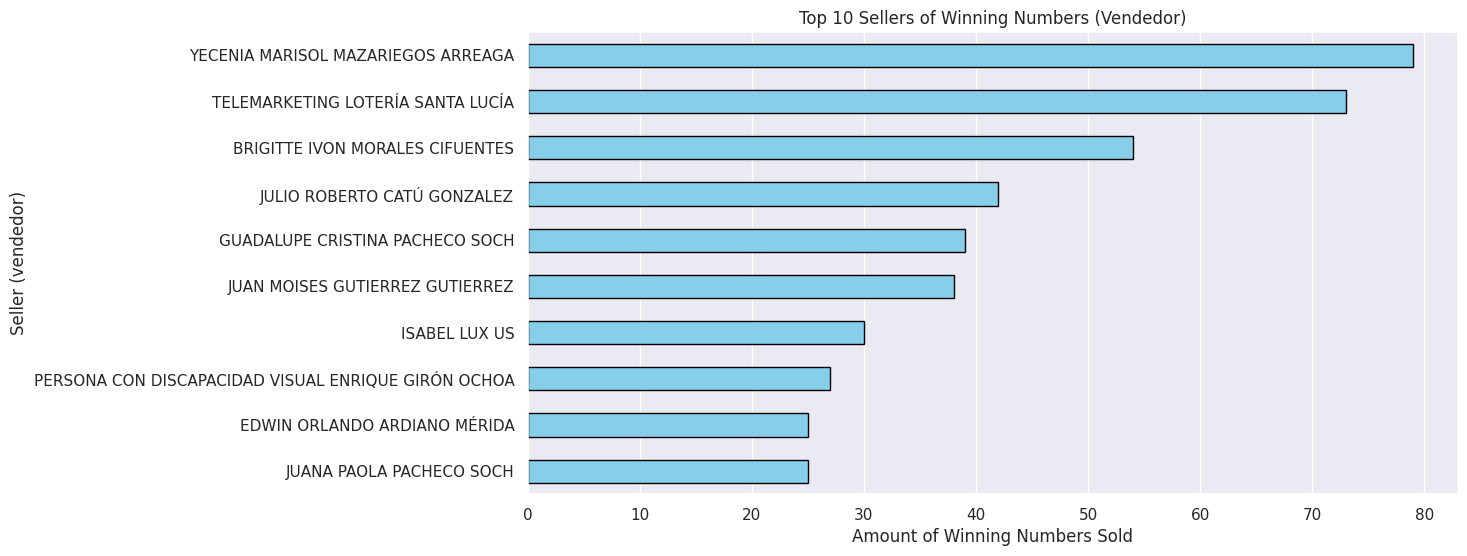

In [21]:
# top 10, seller with more winning numbers
vendedores = df_filtered_vendedor_city_department['vendedor'].value_counts()

plt.figure(figsize=(12, 6))
vendedores.head(10).iloc[::-1].plot(kind='barh', color='skyblue', edgecolor='black') # .iloc[::-1], inverstion of the order of the dataset
plt.title("Top 10 Sellers of Winning Numbers (Vendedor)")
plt.ylabel("Seller (vendedor)")
plt.xlabel("Amount of Winning Numbers Sold")
# plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Top 10, City with more Winning Numbers

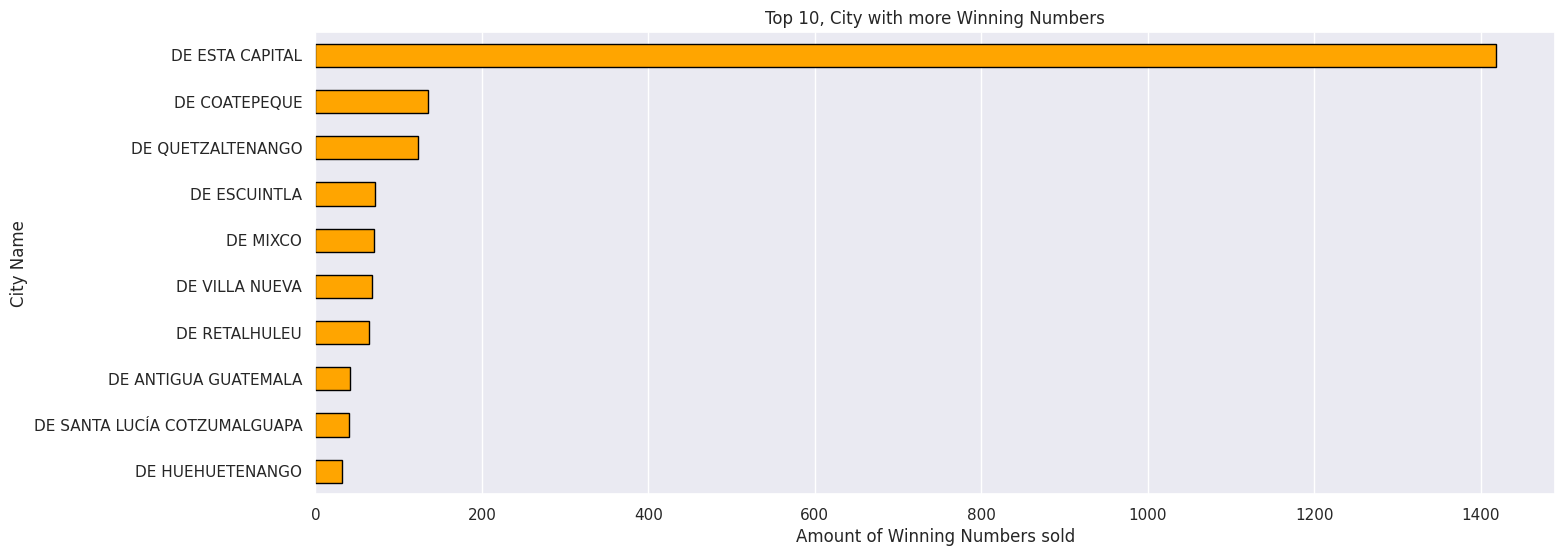

In [22]:
top_ciudades = df_filtered_vendedor_city_department['ciudad'].value_counts()

plt.figure(figsize=(16,6))
top_ciudades.head(10).iloc[::-1].plot(kind='barh', color='orange', edgecolor='black')
plt.title("Top 10, City with more Winning Numbers")
plt.ylabel("City Name")
plt.xlabel("Amount of Winning Numbers sold")
plt.grid(axis='y')
plt.show()

### Sellers by City

In [23]:
# Obtener los top 10 vendedores
top_10_sellers = df_filtered_vendedor_city_department['vendedor'].value_counts().head(10).index

# Filter the dataframe for only include the to 10 sellers
top_sellers_cities = df_filtered_vendedor_city_department[df_filtered_vendedor_city_department['vendedor'].isin(top_10_sellers)]

# Group by seller in order to see their department
seller_city = top_sellers_cities.groupby('vendedor')['ciudad'].unique()
seller_city

vendedor
BRIGITTE IVON MORALES CIFUENTES                          [DE ESTA CAPITAL]
EDWIN ORLANDO ARDIANO MÉRIDA                               [DE COATEPEQUE]
GUADALUPE CRISTINA PACHECO SOCH                          [DE ESTA CAPITAL]
ISABEL LUX US                                            [DE ESTA CAPITAL]
JUAN MOISES GUTIERREZ GUTIERREZ                             [DE ESCUINTLA]
JUANA PAOLA PACHECO SOCH                                 [DE ESTA CAPITAL]
JULIO ROBERTO CATÚ GONZALEZ                              [DE ESTA CAPITAL]
PERSONA CON DISCAPACIDAD VISUAL ENRIQUE GIRÓN OCHOA         [DE ESCUINTLA]
TELEMARKETING LOTERÍA SANTA LUCÍA                        [DE ESTA CAPITAL]
YECENIA MARISOL MAZARIEGOS ARREAGA                     [DE QUETZALTENANGO]
Name: ciudad, dtype: object

In [24]:
# convert dataframe for better visualization
seller_city_df = seller_city.reset_index()
seller_city_df.columns = ['Vendedor', 'Ciudad']

seller_city_df

,Vendedor,Ciudad
0,BRIGITTE IVON MORALES CIFUENTES,[DE ESTA CAPITAL]
1,EDWIN ORLANDO ARDIANO MÉRIDA,[DE COATEPEQUE]
2,GUADALUPE CRISTINA PACHECO SOCH,[DE ESTA CAPITAL]
3,ISABEL LUX US,[DE ESTA CAPITAL]
4,JUAN MOISES GUTIERREZ GUTIERREZ,[DE ESCUINTLA]
5,JUANA PAOLA PACHECO SOCH,[DE ESTA CAPITAL]
6,JULIO ROBERTO CATÚ GONZALEZ,[DE ESTA CAPITAL]
7,PERSONA CON DISCAPACIDAD VISUAL ENRIQUE GIRÓN ...,[DE ESCUINTLA]
8,TELEMARKETING LOTERÍA SANTA LUCÍA,[DE ESTA CAPITAL]
9,YECENIA MARISOL MAZARIEGOS ARREAGA,[DE QUETZALTENANGO]


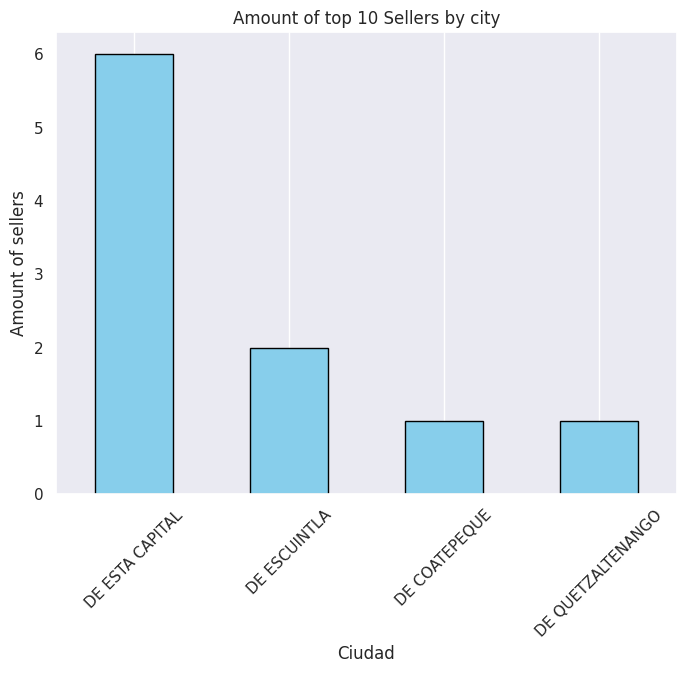

In [25]:
# Contar la cantidad de vendedores por ciudad
vendedores_por_ciudad = seller_city_df['Ciudad'].explode().value_counts()

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
vendedores_por_ciudad.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Amount of top 10 Sellers by city")
plt.xlabel("Ciudad")
plt.ylabel("Amount of sellers")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

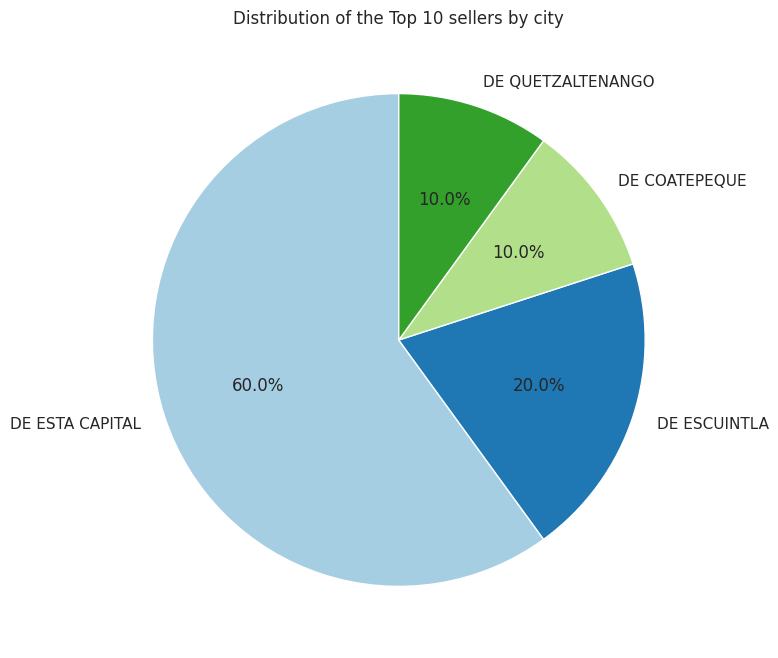

In [26]:
# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
vendedores_por_ciudad.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribution of the Top 10 sellers by city")
plt.ylabel("")  # Remover la etiqueta del eje Y
plt.show()


### Distribution of all Sellers by Department

In [27]:
# Group by department and count the unique sellers
sellers_by_department = df_filtered_vendedor_city_department.groupby('departamento')['vendedor'].nunique()

# Order the sellers and amount of winning numbers sold
sellers_by_department = sellers_by_department.sort_values(ascending=True)

sellers_by_department

departamento
BAJA VERAPÁZ        1
JALAPA              1
QUICHÉ              1
TOTONICAPÁN         1
JUTIAPA             2
PETÉN               2
CHIMALTENANGO       2
HUEHUETENANGO       3
SANTA ROSA          3
SOLOLÁ              3
CHIQUIMULA          5
IZABAL              6
ZACAPA              7
ALTA VERAPÁZ        7
EL PROGRESO         8
SACATEPÉQUEZ        8
SAN MARCOS         10
RETALHULEU         10
SUCHITEPÉQUEZ      12
ESCUINTLA          13
QUETZALTENANGO     19
GUATEMALA         223
Name: vendedor, dtype: int64

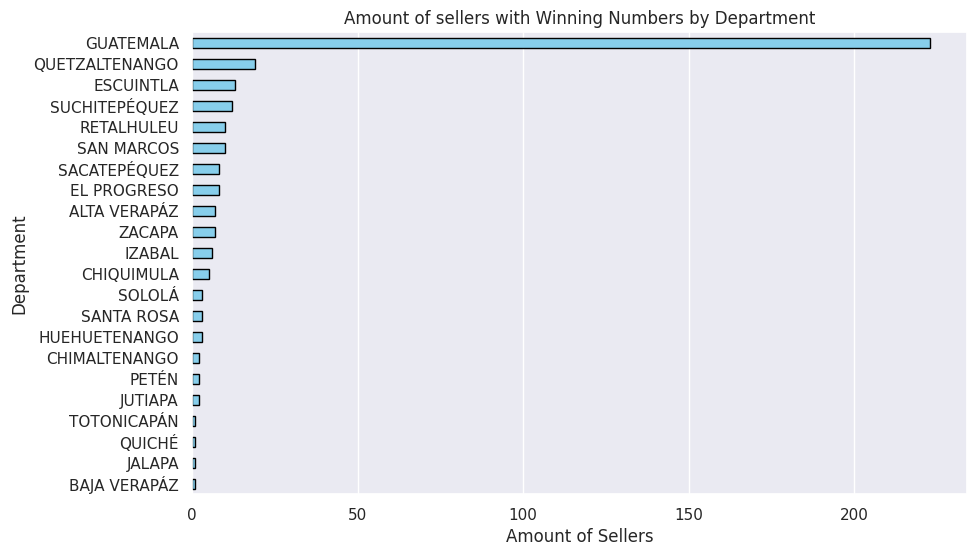

In [28]:
plt.figure(figsize=(10, 6))
sellers_by_department.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Amount of sellers with Winning Numbers by Department")
plt.xlabel("Amount of Sellers")
plt.ylabel("Department")
plt.grid(axis='y')
plt.show()

### Distribution of all Winning numbers by Department

In [29]:
# Group by department and count winning numbers
winning_numbers_by_department = df_filtered_vendedor_city_department.groupby('departamento')['numero_premiado'].count()

# Order the sellers and amount of winning numbers sold
winning_numbers_by_department = winning_numbers_by_department.sort_values(ascending=True)

winning_numbers_by_department

departamento
JALAPA               2
TOTONICAPÁN          3
QUICHÉ               4
BAJA VERAPÁZ         5
SOLOLÁ               5
PETÉN                8
CHIMALTENANGO       10
JUTIAPA             16
SANTA ROSA          20
ALTA VERAPÁZ        21
CHIQUIMULA          23
HUEHUETENANGO       32
IZABAL              33
EL PROGRESO         36
SUCHITEPÉQUEZ       44
ZACAPA              60
SACATEPÉQUEZ        62
SAN MARCOS          63
RETALHULEU          65
ESCUINTLA          141
QUETZALTENANGO     259
GUATEMALA         1644
Name: numero_premiado, dtype: int64

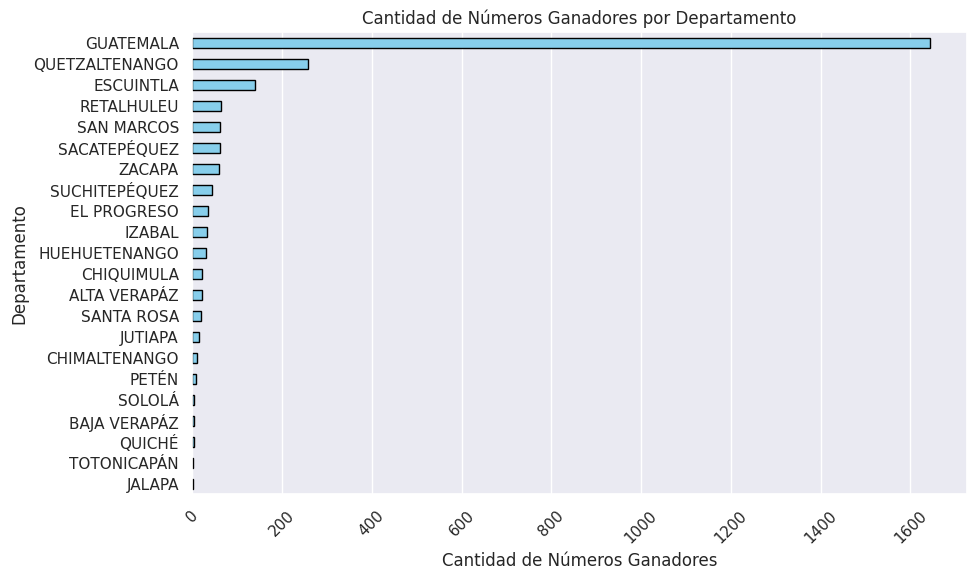

In [30]:
plt.figure(figsize=(10, 6))
winning_numbers_by_department.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Cantidad de Números Ganadores por Departamento")
plt.ylabel("Departamento")
plt.xlabel("Cantidad de Números Ganadores")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Winning numbres sold Vs not sold

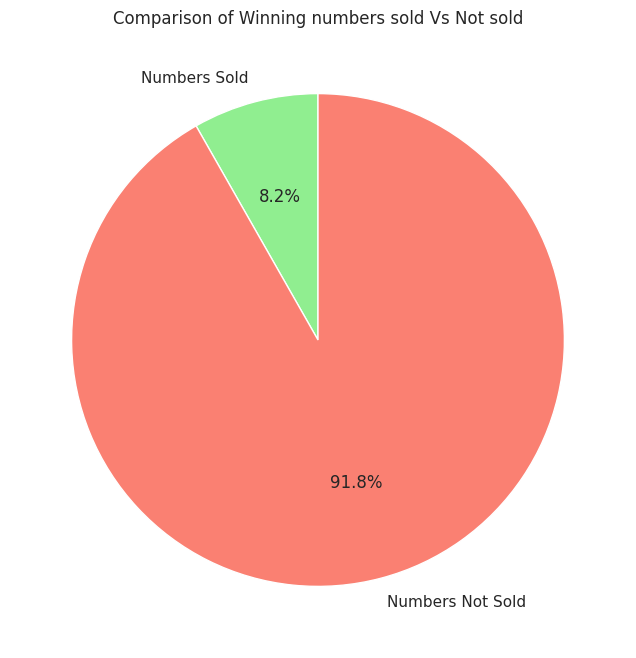

In [31]:
"""
By calculating the total rows in `df_filtered_vendedor_city_department` and the total rows in `df` (the full dataset) 
Well see what is the percentage of winning numbers sold vs the not sold
"""

# Calculate totals
total_numbers = len(df) # total rows of the full dataset
numbers_sold = len(df_filtered_vendedor_city_department) # Total rows of numbers sold
numbers_not_sold = total_numbers - numbers_sold

# Setup for graphs
labels = ['Numbers Sold', 'Numbers Not Sold']
sizes = [numbers_sold, numbers_not_sold]
colors = ['lightgreen', 'salmon']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Comparison of Winning numbers sold Vs Not sold")
plt.show()

### Relationship between the Amount of money won and the Winning Numbers

/tmp/ipykernel_7263/1195232108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_IQR.loc[:, 'rango_numeros'] = pd.cut(


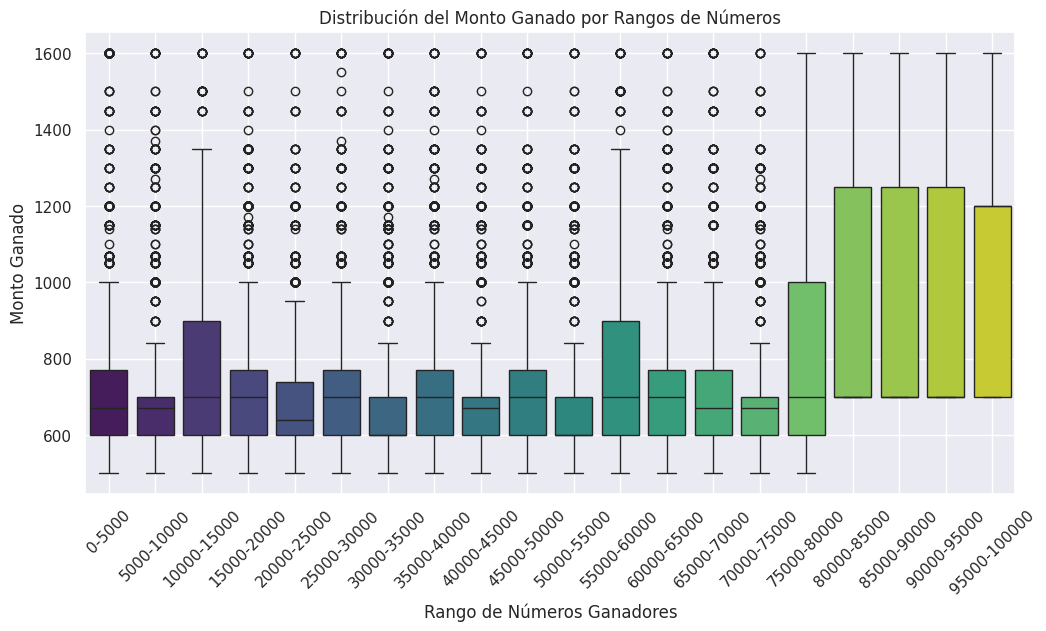

In [32]:
bins = np.arange(0, 105000, 5000)
labels = [f"{b}-{b + 5000}" for b in bins[:-1]]
df_filtered_IQR.loc[:, 'rango_numeros'] = pd.cut(
    df_filtered_IQR['numero_premiado'], bins=bins, labels=labels
)

# Boxplot de los montos por rango de números
plt.figure(figsize=(12, 6))
sns.boxplot(x='rango_numeros', y='monto', data=df_filtered_IQR, palette='viridis', hue='rango_numeros')
plt.title('Distribución del Monto Ganado por Rangos de Números')
plt.xlabel('Rango de Números Ganadores')
plt.ylabel('Monto Ganado')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()